![](./img/logo.png)

# Ejemplo A: Regresión Lineal - MultiVariable

$Sci-Kit Learn$ es un poderoso módulo de Python para el aprendizaje de máquina. 
Contiene funciones de regresión, clasificación, agrupación, selección de modelos y reducción de la dimensionalidad. 

El ejemplo se utilizará el módulo <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html">sklearn.linear_model</a> que contiene 
"métodos destinados a la regresión en los que se espera que el "Target Value" 
sea una combinación lineal de las variables de entrada".




<img src="./img/dict.png" style="width:450px;height:150px;">

## 1.- Se cargan las bibliotecas con sus módulos correspondientes

In [1]:
## Nombre: Geman Daniel Rojas
## Materia: Progrmacion cientifica
## 
## Universidad Sergio Arboleda

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

- <a href="https://matplotlib.org/2.1.2/Matplotlib.pdf">MatPlotLib</a>
- <a href="https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection"> module-sklearn.model_selection </a>
- <a href="https://scikit-learn.org/stable/datasets/index.html"> sklearn.datasets </a>
- <a href="https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics"> sklearn.metrics </a>

## 2.- Exporación y preparación del conjunto de datos 

In [3]:
data = pd.read_csv('./data/data.csv')

In [4]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
data.keys()

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [43]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB
None


In [44]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
R&D Spend,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
Administration,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
Marketing Spend,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
Profit,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83


## 3.- Visualización de los Datos (Selección de Variables Independientes $features$)
- Dispersión par por variables
- Gráfica de Distribución (Baja distribución "no ayuda a la predición de $Target$")
- Gráfica de Matriz de Correlación (relación con la variable $Target$)

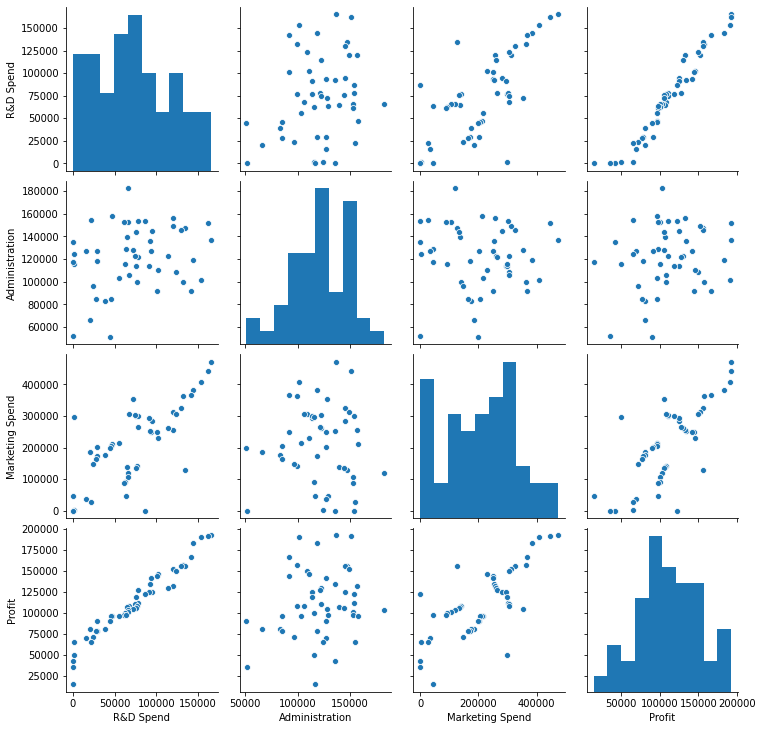

In [46]:
sns.pairplot(data) ##Grafico de dipersion y relacion por variables

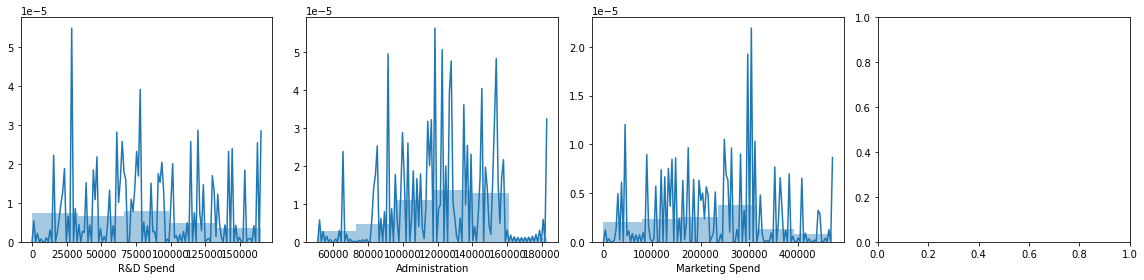

In [64]:
### Visualizar la distribucion de las variables

filas = 1
columnas = 4

fig, ax = plt.subplots(nrows=filas, ncols=columnas, figsize=(16,4), squeeze=False)
columna = data.columns
index = 0 

for i in range(filas):
    for j in range (columnas):
        if(data[columna[index]].dtype != np.object):
            sns.distplot(data[columna[index]], ax = ax[i][j], kde_kws={'bw':0.1})
        index = index+1;
plt.tight_layout()#### ????

In [66]:
matrixCorrelacion = data.corr()
matrixCorrelacion                     ##Se puede observar que hay un gran porcentaje de correlacion del Profit(Target) con
                                      ## con las variables (Maketing Spend 70% correlacion) - (R&D Spend 97% de correlacion

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


### Mapa de Calor para representar la correlación

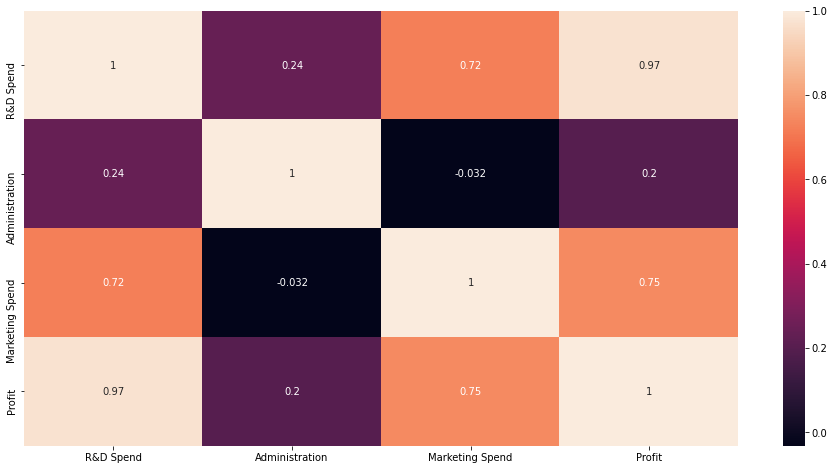

In [67]:
fig, ax  = plt.subplots(figsize=(16,8)) ##Cuando el color posee una tendencia a ser mas claro, significa mas correlaicon
sns.heatmap(matrixCorrelacion,annot=True)

In [68]:
## Funcion de automatización que permite seleccionar las variables que se relacionan con el target basado en un
## umbral de aceptacion

umbral = 0.6 ## un umbral aceptable 


def relacionFeatures(correlacionData, umbralSolicitado):
    feature = []
    valor = []
    for i, index in enumerate(correlacionData.index):
        if abs(correlacionData[index])>umbral:
            feature.append(index)
            valor.append(correlacionData[index])     
    df = pd.DataFrame(data = valor, index=feature,columns=['Valor Correlacion'])
    return df

In [69]:
valorCorrelacion= relacionFeatures(matrixCorrelacion['Profit'],umbral)
valorCorrelacion

,Valor Correlacion
R&D Spend,0.972900
Marketing Spend,0.747766
Profit,1.000000


- Función para seleccionar $features$ con relación a la variable $target$. De esta forma se evita la MULTICOLLINEARITY

## 4.- A continuación se ajustará el modelo de regresión lineal y predecir.
Para estimar los coeficientes se usará el método de <a href="https://www.varsitytutors.com/hotmath/hotmath_help/spanish/topics/line-of-best-fit">Mínimos Cuadrados.</a>. 


### X = dataF.drop['target'] (o variables independientes)
### Y = dataF['target']

### Las funciones importantes a tener en cuenta al ajustar un modelo de regresión lineal son:

**lm.fit()**     -> Ajusta a un modelo lineal

**lm.predict()** -> Predecir **$Y$** usando el modelo lineal con coeficientes estimados

**lm.score()**   -> Devuelve el <a href="https://www.addlink.es/noticias/minitab/2736-como-interpretar-un-modelo-de-regresion-con-bajo-coeficiente-de-determinacion-r-cuadrado-y-bajos-valores-p">coeficiente de determinación (R$^2$)</a>. 
 
 - [Una medida de cuán bien se replican los resultados observados por el modelo, 
como la proporción de la variación total de los resultados explicada por el modelo.]
    

### Por hacer
- Selección de Variables Dep e Ind.
- División Valores en bloques de Entrenamiento y Prueba
- Ajuste a modelo lineal
- Selección del modelo lineal
- Entrenamiento del modelo
- Impresión coeficientes e intersepción.
- Diagrama de Dispersión.

In [73]:
## Variables Independientes
X = data[valorCorrelacion.index].drop('Profit', axis=1)
X.head()

,R&D Spend,Marketing Spend
0,165349.20,471784.10
1,162597.70,443898.53
2,153441.51,407934.54
3,144372.41,383199.62
4,142107.34,366168.42


In [78]:
## Variable dependiente
Y = data['Profit']
Y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [79]:
## Particion del data set entre datos de prueba y de testeo
x_train, x_test, y_train, y_test  = train_test_split(X,Y, test_size=0.2, random_state=0)

## 5.-  Entrenamiento del Modelo

In [76]:
lm = LinearRegression()

In [84]:
ml = lm.fit(x_train,y_train) ## Entrenamiento del modelo

In [85]:
print("Los coeficientes del modelo son: ", ml.coef_)
print("El punto de Inteseccion es : ",ml.intercept_)
print("Formula del modelo es : Y = {}*(x1) + {}*x2 + {} ".format(ml.coef_[0],ml.coef_[1],ml.intercept_))

Los coeficientes del modelo son:  [0.7886183  0.03257663]
El punto de Inteseccion es :  46346.338761236555
Formula del modelo es : Y = 0.7886182999424615*(x1) + 0.03257662731702067*x2 + 46346.338761236555 


In [89]:
y_predict = ml.predict(x_test)
d = {'Predicted':y_predict,'target':y_test}
df = pd.DataFrame(data=d)
df['Predicted'] = df['Predicted'].apply(lambda x: round(x,1))
df.head(10) #Visualzacion de los resultados del modelo

,Predicted,target
28,102284.6,103282.38
11,133873.9,144259.40
10,134182.1,146121.95
41,73701.1,77798.83
2,180642.3,191050.39
27,114717.2,105008.31
38,68335.1,81229.06
31,97433.5,97483.56
22,114580.9,110352.25
4,170343.3,166187.94


## 6.- Métricas y Evaluación del Modelo

In [91]:
score = r2_score(y_test, y_predict)
mae = mean_absolute_error(y_test,y_predict)
mse = mean_squared_error(y_test,y_predict)

print('r2_score ',score)
print('MAE', mae)
print('MSE ',mse)

r2_score  0.9474386447268488
MAE 6886.5945882465185
MSE  67220275.37568131


In [92]:
## Conclusiones

#1. Segun la evalauacion de la metrica (R2) se observa un alto porcentaje de confiabilidad en la prediccion del modelo
#2. Basado en el dataset, se demuestra como (R&D Spend) y (Marketing Spend) son de gran influencia en comportamiento del profit

## 7.- Pruebas con diferentes umbrales de correlación. 
    Se busca la mejor combinación por umbral de coeficientes

In [ ]:
## No se prueba con mas umbrales, ya que no son optimos de estudio dado su valor de correlacion minimo con la variable target